# Chapter IV

## Sharing Visualization with others

### Preparing your figures to share with others

This chapter will focus on creating visualizations that you can share with others and incorporate into automated data analysis pipelines. We'll start with customization of figure styles. Previously, you saw that you can change the appearance of individual elements of the figure, such as the line color, or marker shapes.

Here, we'll change the overall style of the figure. To see what that means, let's look at one of the figures we created in a previous lesson. This figure shows the average temperatures in Seattle and Austin as a function of the months of the year. This is what it looks like per default.

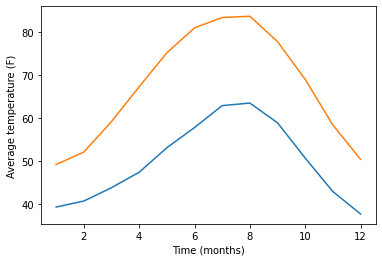

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# DataFrames
seattle_weather = pd.read_csv('datasets/seattle_weather_short.csv')
austin_weather = pd.read_csv('datasets/austin_weather.csv')

# Default Style
fig, ax = plt.subplots()

ax.plot(seattle_weather["DATE"], seattle_weather["MLY-TAVG-NORMAL"])
ax.plot(austin_weather["DATE"], austin_weather["MLY-TAVG-NORMAL"])

ax.set_xlabel("Time (months)")
ax.set_ylabel("Average temperature (F)")

plt.show()

### Choosing a style

If instead, we add this ```plt.style.use("ggplot")```line of code before the plotting code, the figure style will look completely different. The style we chose here emulates the style of the R library ggplot. 

You will notice that the setting of the style didn't change the appearance of just one element in the figure. Rather, it changed multiple elements: the colors are different, the fonts used in the text are different, and there is an added gray background that creates a faint white grid marking the x-axis and y-axis tick locations within the plot area. 

Furthermore, this style will now apply to all of the figures in this session, until you change it by choosing another style.

to go back to the default style, you would run ```plt.style.use("default")```.

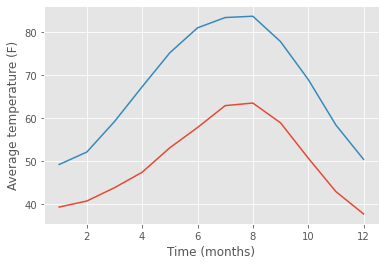

In [5]:
# GGPLOT Style
plt.style.use("ggplot")

fig, ax = plt.subplots()

ax.plot(seattle_weather["DATE"], seattle_weather["MLY-TAVG-NORMAL"])
ax.plot(austin_weather["DATE"], austin_weather["MLY-TAVG-NORMAL"])

ax.set_xlabel("Time (months)")
ax.set_ylabel("Average temperature (F)")

plt.show()

### Available Styles

Matplotlib contains implementations of several different styles and you can see the different styles available by going to this [webpage](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html), which contains a series of visualizations that have each been created using one of the available styles.

### Guidelines for choosing plotting style

* Dark backgrounds are usually less visible

* If color is important, consider choosing colorblind-friendly options:
    - "seaborn-colorblind" or "tableau-colorblind10"

* If you think that someone will want to print your figure, use less ink

* If it will be printed in black-and-white, use the "grayscale" style

## Sharing your visualizations with others

After you have created your visualizations, you are ready to share them with your collaborators, colleagues, and with others. Here, we will show how you would go about doing final customizations to your figures, and saving them in an appropriate format.

### A figure to Share

Take for example this figure that you previously created to display data about the number of gold medals that each of several countries won in the 2016 Olympic Games. 

When you previously ran this code, it displayed the figure on your screen when you called the ```plt.show()``` method at the end of this code.

Now, we replace the call to ```plt.show()``` with a call to the Figure object's **savefig method**. We provide a file-name as input to the function. 

If we do this, the figure will no longer appear on our screen, but instead appear as a file on our file-system called **"gold_medals.png"**.

In [ ]:
# New DataFrame
medals = pd.read_csv('datasets/medals_by_country_2016.csv', index_col=0)
# Figure and Axes
fig, ax = plt.subplots()    
# Add the Data
ax.bar(medals.index, medals["Gold"])
# Labels and Customization
ax.set_xticklabels(medals.index, rotation=90)
ax.set_ylabel("Number of Medals")
# Do not Show the plt instead save the file in your computer
fig.savefig("gold_medals.png")

### Different File Formats

```fig.savefig("gold_medals.jpg")``` 

```fig.savefig("gold_medals.jpg", quality=50)```

```fig.savefig("gold_medals.svg")```

### Resolution

```fig.savefig("gold_medals.png", dpi=300)```

### Size

Finally, another thing that you might want to control is the size of the figure. To control this, the Figure object also has a function called **set_size_inches**. This function takes a **sequence of numbers**. 

The first number sets the **width** of the figure on the page and the second number sets the **height** of the figure. So setting the size would also determine the **aspect ratio** of the figure. For example, you can set your figure to be wide and short; 

```fig.set_size_inches([5, 3])```

or long and narrow, like here.

```fig.set_size_inches([3, 5])```

## Automating Figures from Data

One of the strengths of Matplotlib is that, when programmed correctly, it can flexibly adapt to the inputs that are provided.

### Why Automate?

This means that you can write functions and programs that automatically adjust what they are doing based on the input data. Why would you want to automate figure creation based on the data?

Automation makes it easier to do more. It also allows you to be **faster**. This is one of the major benefits of using a programming language like Python and software libraries such as Matplotlib, over tools that require you to interact with a graphical user interface every time you want to create a new figure. 

Inspecting the incoming data and changing the behavior of the program based on the data provides **flexibility**, as well as **robustness**. 

Finally, an automatic program that adjusts to the data provides **reproducible** behavior across different runs.

* Ease and speed

* Flexibility

* Robustness

* Reproducibility

### How many Different kinds of data?

Let's see what that means for Matplotlib. Consider the data about Olympic medal winners that we've looked at before. Until now, we always looked at two different branches of sports and compared them to each other, but what if we get a new data file, and we don't know how many different sports branches are included in the data? 

For example, what if we had a data-frame with hundreds of rows and a "Sport" column that indicates which branch of sport each row belongs to.

In [8]:
# Dataframe Summer_Medals
summer_2016_medals = pd.read_csv("datasets/summer2016.csv")

# Lets look at the Sports Column
summer_2016_medals["Sport"]

0           Rowing
1        Taekwondo
2         Handball
3        Wrestling
4       Gymnastics
           ...    
2009    Volleyball
2010    Volleyball
2011        Boxing
2012      Canoeing
2013        Hockey
Name: Sport, Length: 2014, dtype: object

### Getting unique values of a column

A **column** in a pandas DataFrame is a **pandas Series object**, so we can get the list of different sports present in the data by calling the **unique method** of that column. This tells us that there are different branches of sport here.

In [9]:
sports = summer_2016_medals["Sport"].unique()
print(sports)

['Rowing' 'Taekwondo' 'Handball' 'Wrestling' 'Gymnastics' 'Swimming'
 'Basketball' 'Boxing' 'Volleyball' 'Athletics' 'Rugby Sevens' 'Judo'
 'Rhythmic Gymnastics' 'Weightlifting' 'Equestrianism' 'Badminton'
 'Water Polo' 'Football' 'Fencing' 'Shooting' 'Sailing' 'Beach Volleyball'
 'Canoeing' 'Hockey' 'Cycling' 'Tennis' 'Diving' 'Table Tennis'
 'Triathlon' 'Archery' 'Synchronized Swimming' 'Modern Pentathlon'
 'Trampolining' 'Golf']


### Bar Chart of heights for all sports

Let's say that we would like to visualize the height of athletes in each one of the sports, with a standard deviation error bar. Given that we don't know in advance how many sports there are in the DataFrame, once we've extracted the unique values, we can loop over them. 

In each iteration through, we set a loop variable called **sport** to be equal to one of these unique values. 

We then create a smaller DataFrame, that we call **sport_df**, by selecting the rows in which the "Sport" column is equal to the sport selected in this iteration. 

We can call the **bar method** of the Axes we created for this plot. As before, it is called with the string that holds the name of the sport as the first argument, the mean method of the "Height" column is set to be the height of the bar and an error bar is set to be equal to the standard deviation of the values in the column. 

After iterating over all of the sports, we exit the loop. 

We can then set the y-label to indicate the meaning of the height of each bar and we can set the x-axis tick labels to be equal to the names of the sports. As we did with the country names in the stacked bar chart that you saw in a previous lesson, we rotate these labels 90 degrees, so that they don't run over each other.

C:\Users\devil\AppData\Local\Temp\ipykernel_18168\2650977901.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(sports, rotation=90)


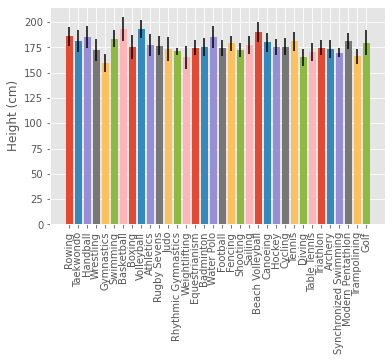

In [10]:
fig, ax = plt.subplots()

for sport in sports:
    sports_df = summer_2016_medals[summer_2016_medals["Sport"] == sport]
    ax.bar(sport, sports_df["Height"].mean(),
           yerr=sports_df["Height"].std())
    
ax.set_ylabel("Height (cm)")
ax.set_xticklabels(sports, rotation=90)

plt.show()    

### Where to go next?

#### Matplotlib Gallery

One way to learn about other kinds of visualizations that you can create with Matplotlib is to visit the online gallery of examples on the Matplotlib website, at this [URL](https://matplotlib.org/stable/gallery/index.html).


#### Plotting data in 3D

You can also extend your capability to visualize data, by adding perspective to your visualizations to make them appear three-dimensional. 

In this [webpage](https://matplotlib.org/2.0.2/mpl_toolkits/mplot3d/tutorial.html), you can learn more about creating three-dimensional visualizations.

#### Visualizing images with pseudo-color

Another capability of Matplotlib is visualizing data from images. You can learn more about working with images in this [URL](https://matplotlib.org/2.0.2/users/image_tutorial.html).

#### Animations

You might remember this visualization that I showed you in the very first lesson of this course. It used one more dimension, **time**, by varying the display through animation. 

You can create animations by creating multiple frames of the movie, each as its own visualization, and then stitching them together into a movie using tools such as **Quicktime**, but Matplotlib also has its own interface for creating animations. 

You can learn about this interface at this [URL](https://matplotlib.org/stable/api/animation_api.html).


#### Using Matplotlib for geospatial data

There are multiple software packages that extend Matplotlib's capability to a variety of different kinds of data. For example, [Cartopy](https://scitools.org.uk/cartopy/docs/latest/) extends Matplotlib to be used with geospatial data, such as maps.

#### Pandas + Matplotlib = Seaborn

Another library that extends Matplotlib is Seaborn. This library creates very sophisticated statistical visualizations from pandas data structures, such as DataFrames. The nice thing about Seaborn is that you can create elegant and sophisticated visualizations of your data with very little code. 

Seaborn also has an extensive example gallery that you can visit in this [URL](https://seaborn.pydata.org/examples/index.html).